In [1]:
import os

target_path = '/Users/NUS/DSS5105/src'

os.makedirs(target_path, exist_ok=True)

In [2]:
os.chdir(target_path)
print(f"Current Working Directory: {os.getcwd()}")

Current Working Directory: c:\Users\NUS\DSS5105\src


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel('../data/building-energy-performance-data-for-2022.xlsm',sheet_name='Commercial Buildings')
df1 = pd.read_excel('../data/tidy_RandomNum.xlsx')
df2 = pd.read_excel('../data/tidy_DataImpKNN.xlsx')
df3 = pd.read_excel('../data/tidy_Spline1.xlsx')
df4 = pd.read_excel('../data/tidy_Spline2.xlsx')
df5 = pd.read_excel('../data/tidy_Spline3.xlsx')


In [5]:
df = df[['Building Name', 'Award (Green/Non-Green)', 'Year of GM Award', 'Green Mark Version']]
df = df.rename(columns = {'Award (Green/Non-Green)': 'Award', 'Green Mark Version': 'GM Version'}) 
df['Award'] = df['Award'].str.lower()

## Merged df1 - tidy_RandomNun & Green mark level

In [6]:
df1[['Building Name', 'Postcode']] = df1['Building'].str.rsplit('_', n=1, expand=True)

df1 = df1[['Building Name', 'Postcode', 'Year', 'latitude', 'longitude', 'Address', 'Type', 'Function', 'Size', 'Employee', 
         'Transportation', 'GFA', 'Energy', 'Waste', 'Water', 'Scope1', 'Scope2', 'Scope3', 'GHG_Total', 'EUI']]

df1['GHG_Intensity'] = df1['GHG_Total'] / df1['GFA']

df1.head()

,Building Name,Postcode,Year,latitude,longitude,Address,Type,Function,Size,Employee,...,GFA,Energy,Waste,Water,Scope1,Scope2,Scope3,GHG_Total,EUI,GHG_Intensity
0,EQUINIX SG3 DATA CENTRE,139963,2021,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,35218.0,1.568330e+08,303.359141,96114.593285,82.745278,1852.640909,1989.558830,3924.945017,4453.205775,0.111447
1,EQUINIX SG3 DATA CENTRE,139963,2022,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,35218.0,1.612840e+08,320.977901,98862.946204,82.333316,1884.787233,1868.680602,3835.801151,4579.589528,0.108916
2,EQUINIX SG3 DATA CENTRE,139963,2023,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,35218.0,1.792709e+08,298.158468,89616.633248,80.000566,1781.716523,1945.781794,3807.498883,5090.320582,0.108112
3,BLK 20 ARC,139964,2021,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,2718,...,38349.0,8.490452e+07,427.221647,111956.768702,126.706759,2240.932227,2027.108792,4394.747778,2213.995752,0.114599
4,BLK 20 ARC,139964,2022,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,2718,...,38349.0,8.840583e+07,423.145873,112537.092470,128.381755,2131.614329,2086.445643,4346.441727,2305.296865,0.113339


In [7]:
merged_df1 = pd.merge(df1, df, on='Building Name', how='left')

merged_df1.head()

,Building Name,Postcode,Year,latitude,longitude,Address,Type,Function,Size,Employee,...,Water,Scope1,Scope2,Scope3,GHG_Total,EUI,GHG_Intensity,Award,Year of GM Award,GM Version
0,EQUINIX SG3 DATA CENTRE,139963,2021,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,96114.593285,82.745278,1852.640909,1989.558830,3924.945017,4453.205775,0.111447,platinum,2022.0,Existing Data Centres
1,EQUINIX SG3 DATA CENTRE,139963,2022,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,98862.946204,82.333316,1884.787233,1868.680602,3835.801151,4579.589528,0.108916,platinum,2022.0,Existing Data Centres
2,EQUINIX SG3 DATA CENTRE,139963,2023,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,89616.633248,80.000566,1781.716523,1945.781794,3807.498883,5090.320582,0.108112,platinum,2022.0,Existing Data Centres
3,BLK 20 ARC,139964,2021,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,2718,...,111956.768702,126.706759,2240.932227,2027.108792,4394.747778,2213.995752,0.114599,NaN,NaN,NaN
4,BLK 20 ARC,139964,2022,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,2718,...,112537.092470,128.381755,2131.614329,2086.445643,4346.441727,2305.296865,0.113339,NaN,NaN,NaN


In [8]:
print(merged_df1['Award'].unique())

['platinum' nan 'goldplus' 'certified' 'gold']


In [9]:
merged_df1.isna().sum()

Building Name         0
Postcode              0
Year                  0
latitude              0
longitude             0
Address               0
Type                  0
Function              0
Size                  0
Employee              0
Transportation        0
GFA                   0
Energy                0
Waste                 0
Water                 0
Scope1                0
Scope2                0
Scope3                0
GHG_Total             0
EUI                   0
GHG_Intensity         0
Award               597
Year of GM Award    597
GM Version          597
dtype: int64

In [10]:
# Adjust all thresholds by a buffer to account for possible imputation
buffer_percentage = 1.1  # 10% buffer for all values
ghg_intensity_benchmarks = {
    'platinum': 0.1,
    'goldplus': 0.12,
    'gold': 0.15,
    'certified': 0.2
}
# Adjusted function assuming potential imputation
def validate_ghg_intensity(row):
    green_mark_level = row['Award']
    ghg_intensity = row['GHG_Intensity']
    
    # Check if Green Mark level is missing
    if pd.isna(green_mark_level):
        return 'No Green Mark'
    
    # Apply buffer to the benchmark threshold
    threshold = ghg_intensity_benchmarks.get(green_mark_level, None)
    if threshold:
        threshold *= buffer_percentage  # Apply the buffer uniformly
    
        # Perform validation
        if ghg_intensity <= threshold:
            return 'Pass'
        else:
            return 'Fail'
    return 'No Green Mark'

# Apply the function
merged_df1['Validation Result'] = merged_df1.apply(validate_ghg_intensity, axis=1)
merged_df1.head()


,Building Name,Postcode,Year,latitude,longitude,Address,Type,Function,Size,Employee,...,Scope1,Scope2,Scope3,GHG_Total,EUI,GHG_Intensity,Award,Year of GM Award,GM Version,Validation Result
0,EQUINIX SG3 DATA CENTRE,139963,2021,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,82.745278,1852.640909,1989.558830,3924.945017,4453.205775,0.111447,platinum,2022.0,Existing Data Centres,Fail
1,EQUINIX SG3 DATA CENTRE,139963,2022,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,82.333316,1884.787233,1868.680602,3835.801151,4579.589528,0.108916,platinum,2022.0,Existing Data Centres,Pass
2,EQUINIX SG3 DATA CENTRE,139963,2023,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,80.000566,1781.716523,1945.781794,3807.498883,5090.320582,0.108112,platinum,2022.0,Existing Data Centres,Pass
3,BLK 20 ARC,139964,2021,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,2718,...,126.706759,2240.932227,2027.108792,4394.747778,2213.995752,0.114599,NaN,NaN,NaN,No Green Mark
4,BLK 20 ARC,139964,2022,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,2718,...,128.381755,2131.614329,2086.445643,4346.441727,2305.296865,0.113339,NaN,NaN,NaN,No Green Mark


## Merged df2 -tidy_DataImpKNN & Green Mark

In [11]:
df2[['Building Name', 'Postcode']] = df2['Building'].str.rsplit('_', n=1, expand=True)

df2 = df2[['Building Name', 'Postcode', 'Year', 'latitude', 'longitude', 'Address', 'Type', 'Function', 'Size', 'Employee', 
         'Transportation', 'GFA', 'Energy', 'Waste', 'Water', 'Scope1', 'Scope2', 'Scope3', 'GHG_Total', 'EUI']]

df2['GHG_Intensity'] = df2['GHG_Total'] / df2['GFA']

merged_df2 = pd.merge(df2, df, on='Building Name', how='left')


In [12]:
buffer_percentage = 1.1 
ghg_intensity_benchmarks = {
    'platinum': 0.1,
    'goldplus': 0.12,
    'gold': 0.15,
    'certified': 0.2
}

def validate_ghg_intensity(row):
    green_mark_level = row['Award']
    ghg_intensity = row['GHG_Intensity']
    
    if pd.isna(green_mark_level):
        return 'No Green Mark'
    
    threshold = ghg_intensity_benchmarks.get(green_mark_level, None)
    if threshold:
        threshold *= buffer_percentage  
       
        if ghg_intensity <= threshold:
            return 'Pass'
        else:
            return 'Fail'
    return 'No Green Mark'

merged_df2['Validation Result'] = merged_df2.apply(validate_ghg_intensity, axis=1)
merged_df2.head()

,Building Name,Postcode,Year,latitude,longitude,Address,Type,Function,Size,Employee,...,Scope1,Scope2,Scope3,GHG_Total,EUI,GHG_Intensity,Award,Year of GM Award,GM Version,Validation Result
0,EQUINIX SG3 DATA CENTRE,139963,2021,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,13772.000000,...,50700.000000,2.562400e+06,1.504000e+06,4.117100e+06,4453.205775,116.903288,platinum,2022.0,Existing Data Centres,Fail
1,EQUINIX SG3 DATA CENTRE,139963,2022,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,13772.000000,...,40300.000000,2.633400e+06,1.292000e+06,3.965700e+06,4579.589528,112.604350,platinum,2022.0,Existing Data Centres,Fail
2,EQUINIX SG3 DATA CENTRE,139963,2023,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,13772.000000,...,29000.000000,2.844300e+06,1.249000e+06,4.122300e+06,5090.320582,117.050940,platinum,2022.0,Existing Data Centres,Fail
3,BLK 20 ARC,139964,2021,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,1996.780757,...,6935.219595,1.040158e+07,7.630775e+05,5.360678e+05,2213.995752,13.978663,NaN,NaN,NaN,No Green Mark
4,BLK 20 ARC,139964,2022,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,1996.780757,...,276938.383177,9.602433e+06,2.168231e+05,4.741558e+04,2305.296865,1.236423,NaN,NaN,NaN,No Green Mark


## Merged_df3 -tidy_Spline1 & Green Mark

In [13]:
df3[['Building Name', 'Postcode']] = df3['Building'].str.rsplit('_', n=1, expand=True)

df3 = df3[['Building Name', 'Postcode', 'Year', 'latitude', 'longitude', 'Address', 'Type', 'Function', 'Size', 'Employee', 
         'Transportation', 'GFA', 'Energy', 'Waste', 'Water', 'Scope1', 'Scope2', 'Scope3', 'GHG_Total', 'EUI']]

df3['GHG_Intensity'] = df3['GHG_Total'] / df3['GFA']

merged_df3 = pd.merge(df3, df, on='Building Name', how='left')


In [14]:
buffer_percentage = 1.1 
ghg_intensity_benchmarks = {
    'platinum': 0.1,
    'goldplus': 0.12,
    'gold': 0.15,
    'certified': 0.2
}

def validate_ghg_intensity(row):
    green_mark_level = row['Award']
    ghg_intensity = row['GHG_Intensity']
    
    if pd.isna(green_mark_level):
        return 'No Green Mark'
    
    threshold = ghg_intensity_benchmarks.get(green_mark_level, None)
    if threshold:
        threshold *= buffer_percentage  
       
        if ghg_intensity <= threshold:
            return 'Pass'
        else:
            return 'Fail'
    return 'No Green Mark'

merged_df3['Validation Result'] = merged_df3.apply(validate_ghg_intensity, axis=1)
merged_df3.head()

,Building Name,Postcode,Year,latitude,longitude,Address,Type,Function,Size,Employee,...,Scope1,Scope2,Scope3,GHG_Total,EUI,GHG_Intensity,Award,Year of GM Award,GM Version,Validation Result
0,GUOCO TOWER,78884,2021,1.2767,103.8452,"1 5 7 9 WALLICH STREET, SINGAPORE 078884",Commercial Building,Office,Large,12000.0,...,461.685178,6713.963806,6365.373117,13541.022101,226.473043,0.104382,platinum,2020.0,New Building for Non-Residential buildings (ve...,Pass
1,GUOCO TOWER,78884,2022,1.2767,103.8452,"1 5 7 9 WALLICH STREET, SINGAPORE 078884",Commercial Building,Office,Large,12000.0,...,469.698537,6595.590912,6718.583587,13783.873035,234.805606,0.106254,platinum,2020.0,New Building for Non-Residential buildings (ve...,Pass
2,GUOCO TOWER,78884,2023,1.2767,103.8452,"1 5 7 9 WALLICH STREET, SINGAPORE 078884",Commercial Building,Office,Large,12000.0,...,109.000000,4527.000000,3945.500000,8581.500000,202.600592,0.066151,platinum,2020.0,New Building for Non-Residential buildings (ve...,Pass
3,SINGAPORE AVIATION ACADEMY,499867,2021,1.3883,103.9903,"1 AVIATION DRIVE, SINGAPORE 499867",Commercial Building,Office,Large,1705.0,...,64.961373,1281.737448,1030.798679,2377.497500,123.218124,0.106290,platinum,2022.0,Existing Non-Residental Buildings ENRB: 2017,Pass
4,SINGAPORE AVIATION ACADEMY,499867,2022,1.3883,103.9903,"1 AVIATION DRIVE, SINGAPORE 499867",Commercial Building,Office,Large,1705.0,...,65.278484,1314.038774,1046.750446,2426.067704,126.745686,0.108462,platinum,2022.0,Existing Non-Residental Buildings ENRB: 2017,Pass


## Merged_df4 - tidy_Spline2 & Green Mark

In [15]:
df4[['Building Name', 'Postcode']] = df4['Building'].str.rsplit('_', n=1, expand=True)

df4 = df4[['Building Name', 'Postcode', 'Year', 'latitude', 'longitude', 'Address', 'Type', 'Function', 'Size', 'Employee', 
         'Transportation', 'GFA', 'Energy', 'Waste', 'Water', 'Scope1', 'Scope2', 'Scope3', 'GHG_Total', 'EUI']]

df4['GHG_Intensity'] = df4['GHG_Total'] / df4['GFA']

merged_df4 = pd.merge(df4, df, on='Building Name', how='left')


In [16]:
buffer_percentage = 1.1 
ghg_intensity_benchmarks = {
    'platinum': 0.1,
    'goldplus': 0.12,
    'gold': 0.15,
    'certified': 0.2
}

def validate_ghg_intensity(row):
    green_mark_level = row['Award']
    ghg_intensity = row['GHG_Intensity']
    
    if pd.isna(green_mark_level):
        return 'No Green Mark'
    
    threshold = ghg_intensity_benchmarks.get(green_mark_level, None)
    if threshold:
        threshold *= buffer_percentage  
       
        if ghg_intensity <= threshold:
            return 'Pass'
        else:
            return 'Fail'
    return 'No Green Mark'

merged_df4['Validation Result'] = merged_df4.apply(validate_ghg_intensity, axis=1)
merged_df4.head()

,Building Name,Postcode,Year,latitude,longitude,Address,Type,Function,Size,Employee,...,Scope1,Scope2,Scope3,GHG_Total,EUI,GHG_Intensity,Award,Year of GM Award,GM Version,Validation Result
0,GUOCO TOWER,78884,2021,1.2767,103.8452,"1 5 7 9 WALLICH STREET, SINGAPORE 078884",Commercial Building,Office,Large,12000.0,...,461.685178,6713.963806,6365.373117,13541.022101,226.473043,0.104382,platinum,2020.0,New Building for Non-Residential buildings (ve...,Pass
1,GUOCO TOWER,78884,2022,1.2767,103.8452,"1 5 7 9 WALLICH STREET, SINGAPORE 078884",Commercial Building,Office,Large,12000.0,...,469.698537,6595.590912,6718.583587,13783.873035,234.805606,0.106254,platinum,2020.0,New Building for Non-Residential buildings (ve...,Pass
2,GUOCO TOWER,78884,2023,1.2767,103.8452,"1 5 7 9 WALLICH STREET, SINGAPORE 078884",Commercial Building,Office,Large,12000.0,...,109.000000,4527.000000,3945.500000,8581.500000,202.600592,0.066151,platinum,2020.0,New Building for Non-Residential buildings (ve...,Pass
3,SINGAPORE AVIATION ACADEMY,499867,2021,1.3883,103.9903,"1 AVIATION DRIVE, SINGAPORE 499867",Commercial Building,Office,Large,1705.0,...,64.961373,1281.737448,1030.798679,2377.497500,123.218124,0.106290,platinum,2022.0,Existing Non-Residental Buildings ENRB: 2017,Pass
4,SINGAPORE AVIATION ACADEMY,499867,2022,1.3883,103.9903,"1 AVIATION DRIVE, SINGAPORE 499867",Commercial Building,Office,Large,1705.0,...,65.278484,1314.038774,1046.750446,2426.067704,126.745686,0.108462,platinum,2022.0,Existing Non-Residental Buildings ENRB: 2017,Pass


## Merged_df5 - tidy_Spline3 & Green Mark

In [17]:
df5[['Building Name', 'Postcode']] = df5['Building'].str.rsplit('_', n=1, expand=True)

df5 = df5[['Building Name', 'Postcode', 'Year', 'latitude', 'longitude', 'Address', 'Type', 'Function', 'Size', 'Employee', 
         'Transportation', 'GFA', 'Energy', 'Waste', 'Water', 'Scope1', 'Scope2', 'Scope3', 'GHG_Total', 'EUI']]

df5['GHG_Intensity'] = df5['GHG_Total'] / df5['GFA']

merged_df5 = pd.merge(df5, df, on='Building Name', how='left')


In [18]:
buffer_percentage = 1.1 
ghg_intensity_benchmarks = {
    'platinum': 0.1,
    'goldplus': 0.12,
    'gold': 0.15,
    'certified': 0.2
}

def validate_ghg_intensity(row):
    green_mark_level = row['Award']
    ghg_intensity = row['GHG_Intensity']
    
    if pd.isna(green_mark_level):
        return 'No Green Mark'
    
    threshold = ghg_intensity_benchmarks.get(green_mark_level, None)
    if threshold:
        threshold *= buffer_percentage  
       
        if ghg_intensity <= threshold:
            return 'Pass'
        else:
            return 'Fail'
    return 'No Green Mark'

merged_df5['Validation Result'] = merged_df5.apply(validate_ghg_intensity, axis=1)
merged_df5.head()

,Building Name,Postcode,Year,latitude,longitude,Address,Type,Function,Size,Employee,...,Scope1,Scope2,Scope3,GHG_Total,EUI,GHG_Intensity,Award,Year of GM Award,GM Version,Validation Result
0,GUOCO TOWER,78884,2021,1.2767,103.8452,"1 5 7 9 WALLICH STREET, SINGAPORE 078884",Commercial Building,Office,Large,12000.0,...,461.685178,6713.963806,6365.373117,13541.022101,226.473043,0.104382,platinum,2020.0,New Building for Non-Residential buildings (ve...,Pass
1,GUOCO TOWER,78884,2022,1.2767,103.8452,"1 5 7 9 WALLICH STREET, SINGAPORE 078884",Commercial Building,Office,Large,12000.0,...,469.698537,6595.590912,6718.583587,13783.873035,234.805606,0.106254,platinum,2020.0,New Building for Non-Residential buildings (ve...,Pass
2,GUOCO TOWER,78884,2023,1.2767,103.8452,"1 5 7 9 WALLICH STREET, SINGAPORE 078884",Commercial Building,Office,Large,12000.0,...,109.000000,4527.000000,3945.500000,8581.500000,202.600592,0.066151,platinum,2020.0,New Building for Non-Residential buildings (ve...,Pass
3,SINGAPORE AVIATION ACADEMY,499867,2021,1.3883,103.9903,"1 AVIATION DRIVE, SINGAPORE 499867",Commercial Building,Office,Large,1705.0,...,64.961373,1281.737448,1030.798679,2377.497500,123.218124,0.106290,platinum,2022.0,Existing Non-Residental Buildings ENRB: 2017,Pass
4,SINGAPORE AVIATION ACADEMY,499867,2022,1.3883,103.9903,"1 AVIATION DRIVE, SINGAPORE 499867",Commercial Building,Office,Large,1705.0,...,65.278484,1314.038774,1046.750446,2426.067704,126.745686,0.108462,platinum,2022.0,Existing Non-Residental Buildings ENRB: 2017,Pass


In [19]:
# Define the GHG Intensity benchmarks for Green Mark levels
ghg_intensity_benchmarks = {
    'platinum': 0.1,
    'goldplus': 0.12,
    'gold': 0.15,
    'certified': 0.2
}

# Validation function
def validate_ghg_intensity(row):
    green_mark_level = row['Award']
    ghg_intensity = row['GHG_Intensity']
    
    # Check for missing values in either field
    if pd.isna(green_mark_level) or pd.isna(ghg_intensity):
        return None
    
    # Get threshold
    green_mark_level = green_mark_level.lower()
    threshold = ghg_intensity_benchmarks.get(green_mark_level)
    
    # Return True for Pass, False for Fail
    if threshold:
        return ghg_intensity <= (threshold * 1.1)  # Including the 10% buffer
    return None

# Function to calculate match rate
def calculate_match_rate(df):
    # Apply validation
    df['Validation Result'] = df.apply(validate_ghg_intensity, axis=1)
    
    # Count only non-null validation results
    valid_results = df['Validation Result'].dropna()
    
    if len(valid_results) == 0:
        return 0.0  # Return 0 if no valid results
    
    # Calculate match rate (True results indicate a match)
    match_rate = valid_results.mean()
    
    # Also return the number of valid cases for reference
    return match_rate, len(valid_results)

# List of dataframes
dataframes = [merged_df1, merged_df2, merged_df3, merged_df4, merged_df5]
match_rates = []

# Calculate match rate for each dataframe
for idx, df in enumerate(dataframes, start=1):
    rate, valid_cases = calculate_match_rate(df)
    match_rates.append((f'merged_df{idx}', rate, valid_cases))
    print(f'merged_df{idx} Match Rate: {rate:.2%} (based on {valid_cases} valid cases)')

# Find the best matching dataframe
best_df, best_match_rate, best_cases = max(match_rates, key=lambda x: x[1])
print(f"\nThe best matching dataset is {best_df} with a match rate of {best_match_rate:.2%}")
print(f"This rate is calculated from {best_cases} valid cases")

merged_df1 Match Rate: 82.72% (based on 810 valid cases)
merged_df2 Match Rate: 4.35% (based on 804 valid cases)
merged_df3 Match Rate: 73.09% (based on 810 valid cases)
merged_df4 Match Rate: 72.96% (based on 810 valid cases)
merged_df5 Match Rate: 72.96% (based on 810 valid cases)

The best matching dataset is merged_df1 with a match rate of 82.72%
This rate is calculated from 810 valid cases


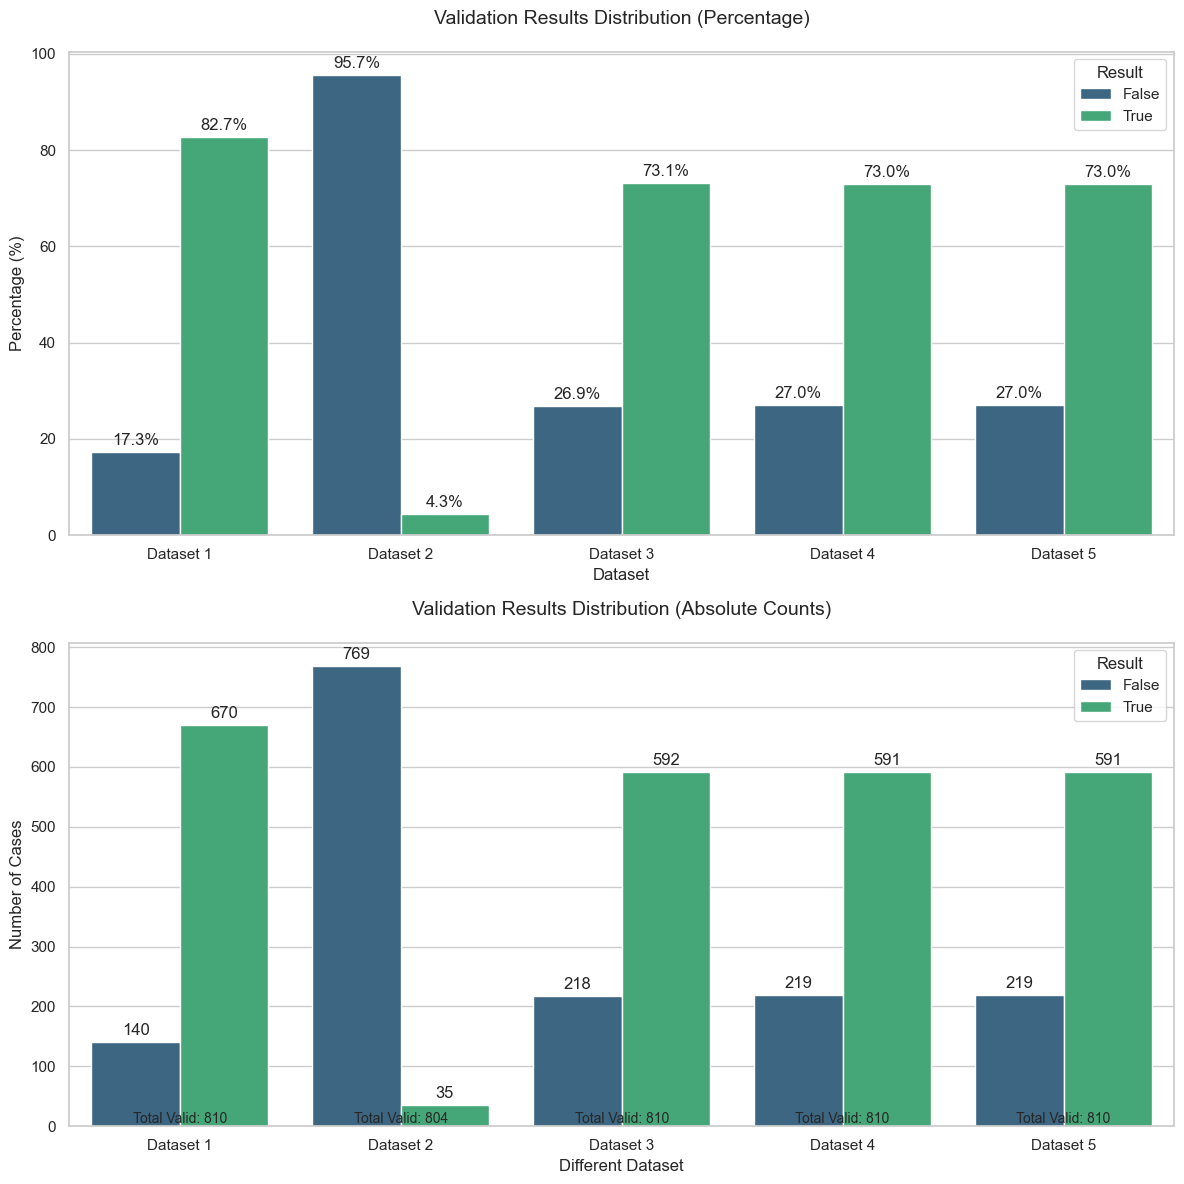


Detailed Statistics:

Dataset 1:
Total valid cases: 810
True: 670 cases (82.7%)
False: 140 cases (17.3%)

Dataset 2:
Total valid cases: 804
False: 769 cases (95.7%)
True: 35 cases (4.3%)

Dataset 3:
Total valid cases: 810
True: 592 cases (73.1%)
False: 218 cases (26.9%)

Dataset 4:
Total valid cases: 810
True: 591 cases (73.0%)
False: 219 cases (27.0%)

Dataset 5:
Total valid cases: 810
True: 591 cases (73.0%)
False: 219 cases (27.0%)


In [42]:
def combined_validation_plot(dataframes):
    result_counts = []
    
    # Collect validation results for each dataframe
    for idx, df in enumerate(dataframes, start=1):
        # Only count non-null validation results
        validation_counts = df['Validation Result'].dropna().value_counts()
        total_valid = validation_counts.sum()
        
        # Convert to percentages
        validation_percentages = (validation_counts / total_valid * 100).round(2)
        
        result_counts.append(pd.DataFrame({
            'Result': validation_percentages.index,
            'Percentage': validation_percentages.values,
            'Count': validation_counts.values,
            'Dataset': f'Dataset {idx}',
            'Total Valid Cases': total_valid
        }))

    # Concatenate all results
    result_df = pd.concat(result_counts)
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Plot 1: Percentage Stacked Bar Chart
    sns.barplot(x='Dataset', y='Percentage', hue='Result', 
                data=result_df, ax=ax1, palette='viridis')
    
    # Customize first plot
    ax1.set_title('Validation Results Distribution (Percentage)', pad=20, fontsize=14)
    ax1.set_xlabel('Dataset', fontsize=12)
    ax1.set_ylabel('Percentage (%)', fontsize=12)
    
    # Add percentage labels on bars
    for container in ax1.containers:
        ax1.bar_label(container, fmt='%.1f%%', padding=3)
    
    # Plot 2: Absolute Count Bar Chart
    sns.barplot(x='Dataset', y='Count', hue='Result', 
                data=result_df, ax=ax2, palette='viridis')
    
    # Customize second plot
    ax2.set_title('Validation Results Distribution (Absolute Counts)', pad=20, fontsize=14)
    ax2.set_xlabel('Different Dataset', fontsize=12)
    ax2.set_ylabel('Number of Cases', fontsize=12)
    
    # Add count labels on bars
    for container in ax2.containers:
        ax2.bar_label(container, padding=3)
    
    # Add total valid cases as text below each dataset
    for idx, dataset in enumerate(result_df['Dataset'].unique()):
        total = result_df[result_df['Dataset'] == dataset]['Total Valid Cases'].iloc[0]
        ax2.text(idx, 0, f'Total Valid: {total}', 
                 ha='center', va='bottom', fontsize=10,
                 transform=ax2.get_xaxis_transform())
    
    # Adjust layout and display
    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print("\nDetailed Statistics:")
    for dataset in result_df['Dataset'].unique():
        dataset_stats = result_df[result_df['Dataset'] == dataset]
        total = dataset_stats['Total Valid Cases'].iloc[0]
        print(f"\n{dataset}:")
        print(f"Total valid cases: {total}")
        for _, row in dataset_stats.iterrows():
            print(f"{row['Result']}: {row['Count']} cases ({row['Percentage']:.1f}%)")

# Plot combined validation results
combined_validation_plot(dataframes)


## Sensitivity Analysis

In [21]:
# Define emission factors for each activity related to its scope
final_df = merged_df1.copy()
emission_factors = {
    'energy': 0.0005,        # Scope 2: tCO2e per kWh
    'water': 0.0003,         # Scope 3: tCO2e per m3
    'waste': 0.2,            # Scope 3: tCO2e per ton
    'transportation': 0.00015  # Scope 1/3: tCO2e per km (use based on vehicle ownership)
}

# Sensitivity factors for adjustment
sensitivity_factors = [0.9, 1.0, 1.1]  # -10%, 0%, +10%

# Storage for analysis results
sensitivity_results = []

for factor in sensitivity_factors:
    # Adjust activities by the sensitivity factor
    adjusted_energy = final_df['Energy'] * factor
    adjusted_water = final_df['Water'] * factor
    adjusted_waste = final_df['Waste'] * factor
    adjusted_transport = final_df['Transportation'] * factor
    
    # Calculate adjusted GHG emissions by scope
    adjusted_scope1 = adjusted_transport * emission_factors['transportation']
    adjusted_scope2 = adjusted_energy * emission_factors['energy']
    adjusted_scope3 = (adjusted_water * emission_factors['water']) + (adjusted_waste * emission_factors['waste'])
    
    # Calculate adjusted total GHG emissions
    total_ghg_emissions = adjusted_scope1 + adjusted_scope2 + adjusted_scope3
    
    # Store results
    result = pd.DataFrame({
        'Building Name': df['Building Name'],
        f'Scope1 (factor {factor})': adjusted_scope1,
        f'Scope2 (factor {factor})': adjusted_scope2,
        f'Scope3 (factor {factor})': adjusted_scope3,
        f'Total GHG Emissions (factor {factor})': total_ghg_emissions
    })
    
    sensitivity_results.append(result)

# Combine the sensitivity analysis results for comparison
sensitivity_df = pd.concat(sensitivity_results, axis=1)
sensitivity_df

,Building Name,Scope1 (factor 0.9),Scope2 (factor 0.9),Scope3 (factor 0.9),Total GHG Emissions (factor 0.9),Building Name,Scope1 (factor 1.0),Scope2 (factor 1.0),Scope3 (factor 1.0),Total GHG Emissions (factor 1.0),Building Name,Scope1 (factor 1.1),Scope2 (factor 1.1),Scope3 (factor 1.1),Total GHG Emissions (factor 1.1)
0,GUOCO TOWER,2739.725756,70574.850450,80.555586,73395.131791,GUOCO TOWER,3044.139729,78416.500500,89.506206,81550.146435,GUOCO TOWER,3348.553702,86258.150550,98.456827,89705.161078
1,GUOCO TOWER,2739.725756,72577.792800,84.469018,75401.987574,GUOCO TOWER,3044.139729,80641.992000,93.854464,83779.986193,GUOCO TOWER,3348.553702,88706.191200,103.239910,92157.984812
2,GUOCO TOWER,2739.725756,80671.909620,77.865015,83489.500392,GUOCO TOWER,3044.139729,89635.455134,86.516684,92766.111546,GUOCO TOWER,3348.553702,98599.000647,95.168352,102042.722701
3,SINGAPORE AVIATION ACADEMY,2661.489994,38207.035400,107.128224,40975.653617,SINGAPORE AVIATION ACADEMY,2957.211104,42452.261555,119.031360,45528.504019,SINGAPORE AVIATION ACADEMY,3252.932215,46697.487711,130.934496,50081.354421
4,SINGAPORE AVIATION ACADEMY,2661.489994,39782.623266,106.551272,42550.664532,SINGAPORE AVIATION ACADEMY,2957.211104,44202.914740,118.390302,47278.516147,SINGAPORE AVIATION ACADEMY,3252.932215,48623.206214,130.229333,52006.367761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,LAND TRANSPORT AUTHORITY,3774.248850,7219.790891,143.906113,11137.945854,LAND TRANSPORT AUTHORITY,4193.609834,8021.989879,159.895681,12375.495394,LAND TRANSPORT AUTHORITY,4612.970817,8824.188867,175.885249,13613.044933
1403,LAND TRANSPORT AUTHORITY,3774.248850,7219.790891,143.906113,11137.945854,LAND TRANSPORT AUTHORITY,4193.609834,8021.989879,159.895681,12375.495394,LAND TRANSPORT AUTHORITY,4612.970817,8824.188867,175.885249,13613.044933
1404,XILINX ASIA PACIFIC PTE LTD,4836.936120,9545.380109,231.706180,14614.022408,XILINX ASIA PACIFIC PTE LTD,5374.373467,10605.977899,257.451311,16237.802676,XILINX ASIA PACIFIC PTE LTD,5911.810813,11666.575688,283.196442,17861.582944
1405,XILINX ASIA PACIFIC PTE LTD,4836.936120,6080.416838,229.518367,11146.871325,XILINX ASIA PACIFIC PTE LTD,5374.373467,6756.018709,255.020407,12385.412583,XILINX ASIA PACIFIC PTE LTD,5911.810813,7431.620580,280.522448,13623.953841


In [22]:
features = ['Energy', 'Waste', 'Water', 'Transportation']
sensitivity_results = {}

for factor in sensitivity_factors:
    for feature in features:
        # Create a copy of the dataframe for each feature adjustment
        adjusted_df = final_df.copy()
        
        if feature == 'Energy':
            # Adjust Scope 2 emissions for Energy
            adjusted_df['Scope2'] = final_df['Scope2'] * factor
        elif feature == 'Waste':
            # Adjust Scope 3 emissions for Waste
            adjusted_df['Scope3'] = final_df['Scope3'] * factor
        elif feature == 'Water':
            # Adjust Scope 3 emissions for Water
            adjusted_df['Scope3'] = final_df['Scope3'] * factor
        elif feature == 'Transportation':
            # Adjust Scope 1 or Scope 3 emissions for Transportation
            adjusted_df['Scope1'] = final_df['Scope1'] * factor

        # Recalculate total GHG emissions with adjusted scope
        adjusted_df['Adjusted GHG_Total'] = adjusted_df['Scope1'] + adjusted_df['Scope2'] + adjusted_df['Scope3']
        
        # Calculate the percentage change in total GHG emissions
        sensitivity_change = ((adjusted_df['Adjusted GHG_Total'] - final_df['GHG_Total']) / final_df['GHG_Total']) * 100
        mean_sensitivity = sensitivity_change.mean()
        
        # Store the mean sensitivity for this feature and factor
        sensitivity_results[(feature, factor)] = mean_sensitivity

# Convert sensitivity results into a DataFrame
sensitivity_df = pd.DataFrame.from_dict(sensitivity_results, orient='index', columns=['Mean Sensitivity'])
sensitivity_df.index = pd.MultiIndex.from_tuples(sensitivity_df.index, names=['Feature', 'Factor'])

sensitivity_df


,,Mean Sensitivity
Feature,Factor,
Energy,0.9,-5.125945e+00
Waste,0.9,-4.640307e+00
Water,0.9,-4.640307e+00
Transportation,0.9,-2.337479e-01
Energy,1.0,-4.532100e-16
Waste,1.0,-4.532100e-16
Water,1.0,-4.532100e-16
Transportation,1.0,-4.532100e-16
Energy,1.1,5.125945e+00


## Validation Testing

In [23]:
test_data = pd.read_excel('../data/merged_df1.xlsx')

In [24]:
test_data.head()

,Building Name,Postcode,Year,latitude,longitude,Address,Type,Function,Size,Employee,...,Scope2,Scope3,GHG_Total,EUI,GHG_Intensity,Award,Year of GM Award,GM Version,Validation Result,Expected Result
0,EQUINIX SG3 DATA CENTRE,139963,2021,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,1852.640909,1989.558830,3924.945017,4453.205775,0.111447,platinum,2022.0,Existing Data Centres,0.0,True
1,EQUINIX SG3 DATA CENTRE,139963,2022,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,1884.787233,1868.680602,3835.801151,4579.589528,0.108916,platinum,2022.0,Existing Data Centres,0.0,True
2,EQUINIX SG3 DATA CENTRE,139963,2023,1.2767,103.8452,"26A AYER RAJAH CRESCENT, SINGAPORE 139963",Commercial Building,Office,Large,3349,...,1781.716523,1945.781794,3807.498883,5090.320582,0.108112,platinum,2022.0,Existing Data Centres,0.0,True
3,BLK 20 ARC,139964,2021,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,2718,...,2240.932227,2027.108792,4394.747778,2213.995752,0.114599,NaN,NaN,NaN,NaN,False
4,BLK 20 ARC,139964,2022,1.3883,103.9903,"BLK 20 AYER RAJAH CRESCENT, SINGAPORE 139964",Commercial Building,Office,Large,2718,...,2131.614329,2086.445643,4346.441727,2305.296865,0.113339,NaN,NaN,NaN,NaN,False


In [25]:
class GreenMarkValidator:
    """
    Backend validator that processes form data and returns display-ready results
    """
    def __init__(self):
        # Green Mark benchmarks
        self.benchmarks = {
            'platinum': 0.1,
            'goldplus': 0.12,
            'gold': 0.15,
            'certified': 0.2
        }
        
    def calculate_ghg_emissions(self, form_data):
        """Calculate GHG emissions and intensity"""
        try:
            # Convert form data to float
            gfa = float(form_data['gfa'])
            scope1 = float(form_data['scope1'])
            scope2 = float(form_data['scope2'])
            scope3 = float(form_data['scope3'])
            
            # Calculate total GHG
            total_ghg = scope1 + scope2 + scope3
            
            # Calculate GHG intensity
            ghg_intensity = total_ghg / gfa
            
            return {
                'success': True,
                'ghg_intensity': ghg_intensity,
                'total_ghg': total_ghg,
                'scope1': scope1,
                'scope2': scope2,
                'scope3': scope3
            }
        except Exception as e:
            return {
                'success': False,
                'error': str(e)
            }

    def predict_and_validate(self, form_data):
        """
        Process form data and return prediction results
        """
        # Calculate emissions first
        emissions = self.calculate_ghg_emissions(form_data)
        if not emissions['success']:
            return emissions
            
        ghg_intensity = emissions['ghg_intensity']
        
        # Determine predicted Green Mark level
        predicted_level = 'Not Certified'
        for level, threshold in sorted(self.benchmarks.items(), 
                                    key=lambda x: x[1]):
            if ghg_intensity <= threshold:
                predicted_level = level
                break
        
        # Get threshold for predicted level
        threshold = self.benchmarks.get(predicted_level, float('inf'))
        
        # Calculate how far from the threshold
        if predicted_level != 'Not Certified':
            margin = threshold - ghg_intensity
            margin_percentage = (margin / threshold) * 100
        else:
            margin = ghg_intensity - self.benchmarks['certified']
            margin_percentage = -(margin / self.benchmarks['certified']) * 100

        # Prepare results for display
        results = {
            'success': True,
            'building_info': {
                'name': form_data['building_name'],
                'gfa': float(form_data['gfa'])
            },
            'ghg_results': {
                'intensity': round(ghg_intensity, 4),
                'total': round(emissions['total_ghg'], 2),
                'breakdown': {
                    'scope1': round(emissions['scope1'], 2),
                    'scope2': round(emissions['scope2'], 2),
                    'scope3': round(emissions['scope3'], 2)
                }
            },
            'prediction': {
                'predicted_level': predicted_level,
                'threshold': threshold,
                'margin': round(margin, 4),
                'margin_percentage': round(margin_percentage, 2)
            },
            'display_messages': [
                f"GHG Intensity: {round(ghg_intensity, 4)} tCO₂e/m²",
                f"Predicted Green Mark Level: {predicted_level}",
                f"{'Below' if predicted_level != 'Not Certified' else 'Above'} threshold by {abs(round(margin_percentage, 2))}%"
            ]
        }
        
        return results

In [26]:
# Separate buildings with and without Green Mark levels
buildings_with_gm = merged_df1[merged_df1['Award'].notna()].copy()
buildings_without_gm = merged_df1[merged_df1['Award'].isna()].copy()

print(f"Total Buildings with Green Mark: {len(buildings_with_gm['Building Name'].unique())}")
print(f"Total Records without Green Mark: {len(buildings_without_gm)}")
print(f"Unique Buildings without Green Mark: {len(buildings_without_gm['Building Name'].unique())}")


Total Buildings with Green Mark: 252
Total Records without Green Mark: 597
Unique Buildings without Green Mark: 166


In [27]:
validator = GreenMarkValidator()

In [28]:
# 1. Test predictions on buildings without Green Mark
def get_predictions(df):
    predictions = []
    for _, building in df.iterrows():
        # Prepare building data
        building_data = {
            'building_name': building['Building Name'],
            'gfa': building['GFA'],
            'scope1': building['Scope1'],
            'scope2': building['Scope2'],
            'scope3': building['Scope3']
        }
        
        # Get prediction
        result = validator.predict_and_validate(building_data)
        
        if result['success']:
            predictions.append({
                'building_name': building['Building Name'],
                'year': building['Year'],
                'ghg_intensity': result['ghg_results']['intensity'],
                'predicted_level': result['prediction']['predicted_level'],
                'total_ghg': result['ghg_results']['total'],
                'margin_percentage': result['prediction']['margin_percentage']
            })
            
    return pd.DataFrame(predictions)


In [29]:
# 2. Get predictions for each year
predictions_df = get_predictions(buildings_without_gm)

print("\nOverall Prediction Distribution:")
print(predictions_df['predicted_level'].value_counts())


Overall Prediction Distribution:
predicted_level
goldplus    434
platinum    127
gold         36
Name: count, dtype: int64


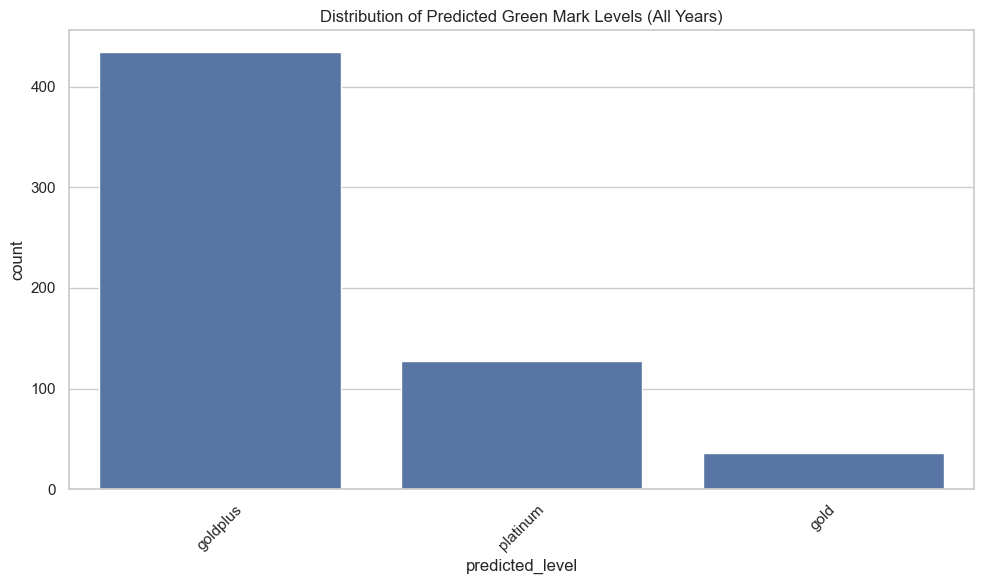

In [30]:
# 3. Visualize results
plt.figure(figsize=(10, 6))
sns.countplot(data=predictions_df, x='predicted_level')
plt.title('Distribution of Predicted Green Mark Levels (All Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

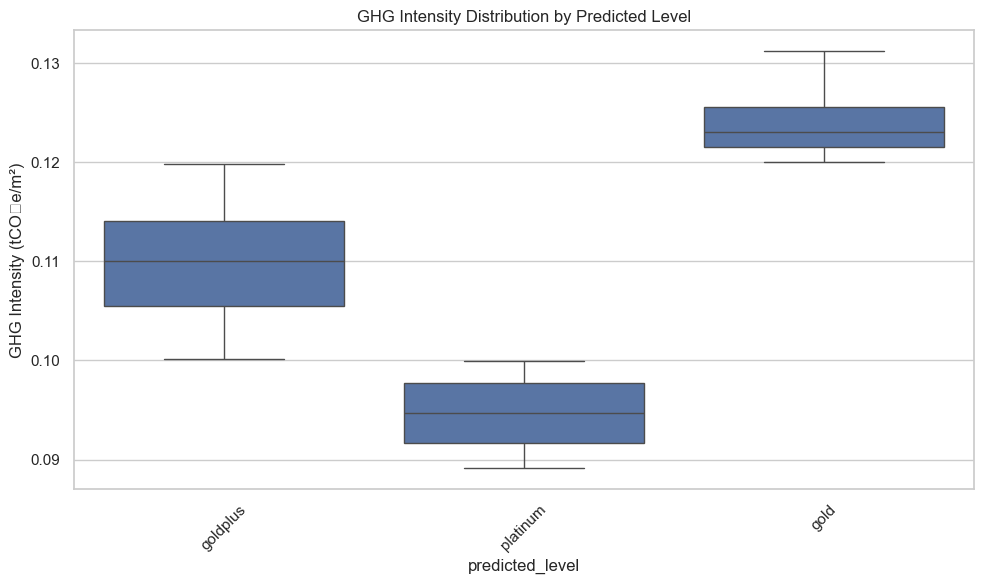

In [31]:
# GHG Intensity Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=predictions_df, x='predicted_level', y='ghg_intensity')
plt.title('GHG Intensity Distribution by Predicted Level')
plt.ylabel('GHG Intensity (tCO₂e/m²)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# 4. Summary Statistics
print("\nSummary Statistics by Predicted Level:")
summary_stats = predictions_df.groupby('predicted_level').agg({
    'ghg_intensity': ['count', 'mean', 'std', 'min', 'max']
}).round(4)
print(summary_stats)


Summary Statistics by Predicted Level:
                ghg_intensity                                
                        count    mean     std     min     max
predicted_level                                              
gold                       36  0.1239  0.0031  0.1200  0.1312
goldplus                  434  0.1098  0.0051  0.1001  0.1198
platinum                  127  0.0948  0.0033  0.0891  0.0999


In [33]:
# 5. Year-wise analysis
print("\nPrediction Distribution by Year:")
year_dist = predictions_df.pivot_table(
    index='year',
    columns='predicted_level',
    values='building_name',
    aggfunc='count',
    fill_value=0
)
print(year_dist)


Prediction Distribution by Year:
predicted_level  gold  goldplus  platinum
year                                     
2021               13       147        39
2022               10       146        43
2023               13       141        45


In [34]:
# 6. Analyze prediction consistency
print("\nBuildings with Varying Predictions:")
prediction_changes = predictions_df.groupby('building_name')['predicted_level'].nunique()
varying_predictions = prediction_changes[prediction_changes > 1]
print(f"Number of buildings with varying predictions: {len(varying_predictions)}")

if len(varying_predictions) > 0:
    print("\nDetailed view of buildings with varying predictions:")
    for building in varying_predictions.index:
        building_pred = predictions_df[predictions_df['building_name'] == building]
        print(f"\n{building}:")
        print(building_pred[['year', 'ghg_intensity', 'predicted_level']].sort_values('year'))


Buildings with Varying Predictions:
Number of buildings with varying predictions: 26

Detailed view of buildings with varying predictions:

1KAY SIANG ROAD:
     year  ghg_intensity predicted_level
150  2021         0.1028        goldplus
151  2022         0.0993        platinum
152  2023         0.0991        platinum

ACER BUILDING:
     year  ghg_intensity predicted_level
141  2021         0.1028        goldplus
142  2022         0.0990        platinum
143  2023         0.1008        goldplus

CREATIVE INNOVATIVE DEVELOPMENT CENTRE:
     year  ghg_intensity predicted_level
468  2021         0.1019        goldplus
469  2022         0.1012        goldplus
470  2023         0.0971        platinum

DSO NATIONAL LABORATORIES:
     year  ghg_intensity predicted_level
3    2021         0.0948        platinum
4    2021         0.0948        platinum
27   2021         0.1165        goldplus
28   2021         0.1165        goldplus
567  2021         0.1118        goldplus
568  2021         0

In [35]:
# 7. Identify buildings needing improvement (by year)
print("\nBuildings with Highest GHG Intensity (Top 5 each year):")
for year in predictions_df['year'].unique():
    year_data = predictions_df[predictions_df['year'] == year]
    print(f"\nYear {year}:")
    high_intensity = year_data.nlargest(5, 'ghg_intensity')
    print(high_intensity[['building_name', 'ghg_intensity', 'predicted_level']])


Buildings with Highest GHG Intensity (Top 5 each year):

Year 2021:
                building_name  ghg_intensity predicted_level
210  LAND TRANSPORT AUTHORITY         0.1260            gold
408                  PEC LTD.         0.1253            gold
108            6 BATTERY ROAD         0.1248            gold
222              BEA BUILDING         0.1242            gold
12      ESR BIZPARK@CHAI CHEE         0.1232            gold

Year 2022:
                building_name  ghg_intensity predicted_level
223              BEA BUILDING         0.1301            gold
211  LAND TRANSPORT AUTHORITY         0.1288            gold
331               CECIL COURT         0.1262            gold
409                  PEC LTD.         0.1254            gold
169         MOEHQ (BALESTIER)         0.1248            gold

Year 2023:
                building_name  ghg_intensity predicted_level
212  LAND TRANSPORT AUTHORITY         0.1312            gold
224              BEA BUILDING         0.1312         

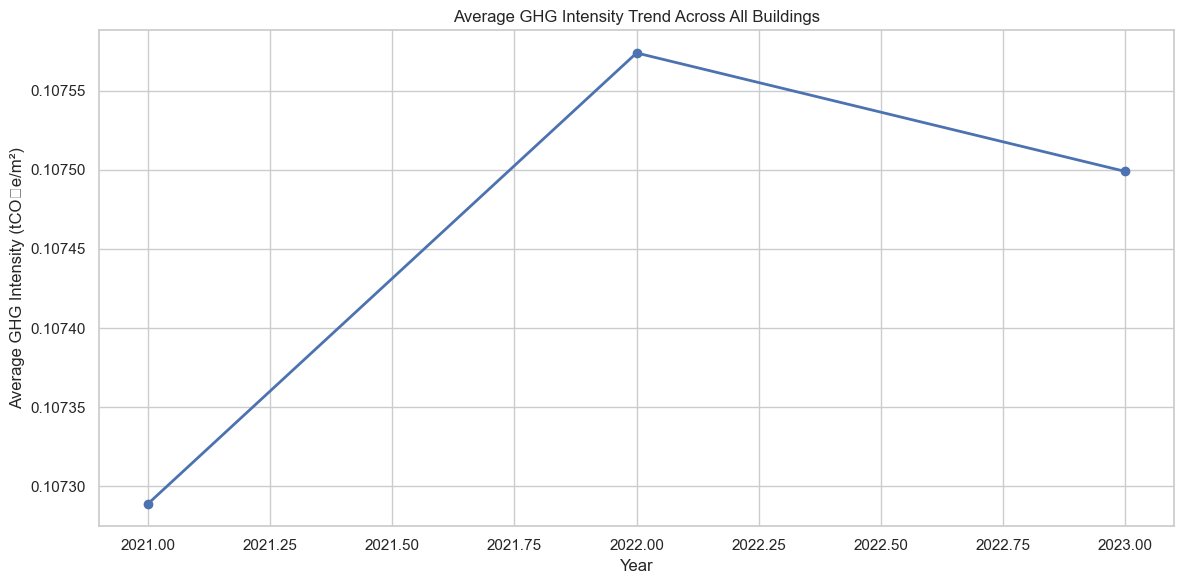

In [36]:
# 8. Trend Analysis
plt.figure(figsize=(12, 6))
yearly_avg = predictions_df.groupby('year')['ghg_intensity'].mean()
plt.plot(yearly_avg.index, yearly_avg.values, marker='o', linestyle='-', linewidth=2)
plt.title('Average GHG Intensity Trend Across All Buildings')
plt.xlabel('Year')
plt.ylabel('Average GHG Intensity (tCO₂e/m²)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
# 9. Function for detailed building analysis
def analyze_building_trend(building_name, df=predictions_df):
    """Analyze prediction trends for a specific building"""
    building_data = df[df['building_name'] == building_name].sort_values('year')
    
    if len(building_data) == 0:
        print(f"No data found for building: {building_name}")
        return
        
    print(f"\nAnalysis for: {building_name}")
    print("-" * 50)
    
    # Show yearly predictions
    print("\nYearly Predictions:")
    print(building_data[['year', 'ghg_intensity', 'predicted_level']].to_string(index=False))
    
    # Plot GHG intensity trend
    plt.figure(figsize=(10, 6))
    plt.plot(building_data['year'], building_data['ghg_intensity'], 
             marker='o', linestyle='-', linewidth=2)
    plt.title(f'GHG Intensity Trend for {building_name}')
    plt.xlabel('Year')
    plt.ylabel('GHG Intensity (tCO₂e/m²)')
    plt.grid(True)
    
    # Add labels for predicted levels
    for _, row in building_data.iterrows():
        plt.annotate(row['predicted_level'], 
                    (row['year'], row['ghg_intensity']),
                    textcoords="offset points",
                    xytext=(0,10),
                    ha='center')
    
    plt.tight_layout()
    plt.show()



Detailed Analysis of Sample Buildings:

Analysis for: RAZER SEA HQ
--------------------------------------------------

Yearly Predictions:
 year  ghg_intensity predicted_level
 2021         0.1052        goldplus
 2022         0.1068        goldplus
 2023         0.1071        goldplus


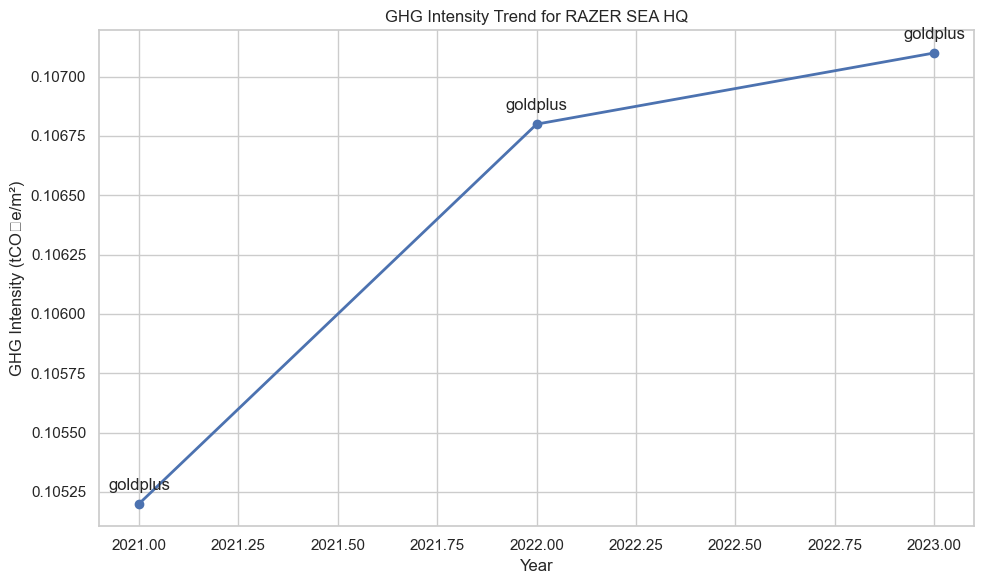


Analysis for: 1ST SCDF DIVISION HQ / ALEXANDRA FIRE STATION
--------------------------------------------------

Yearly Predictions:
 year  ghg_intensity predicted_level
 2021         0.0997        platinum
 2022         0.0993        platinum
 2023         0.0987        platinum


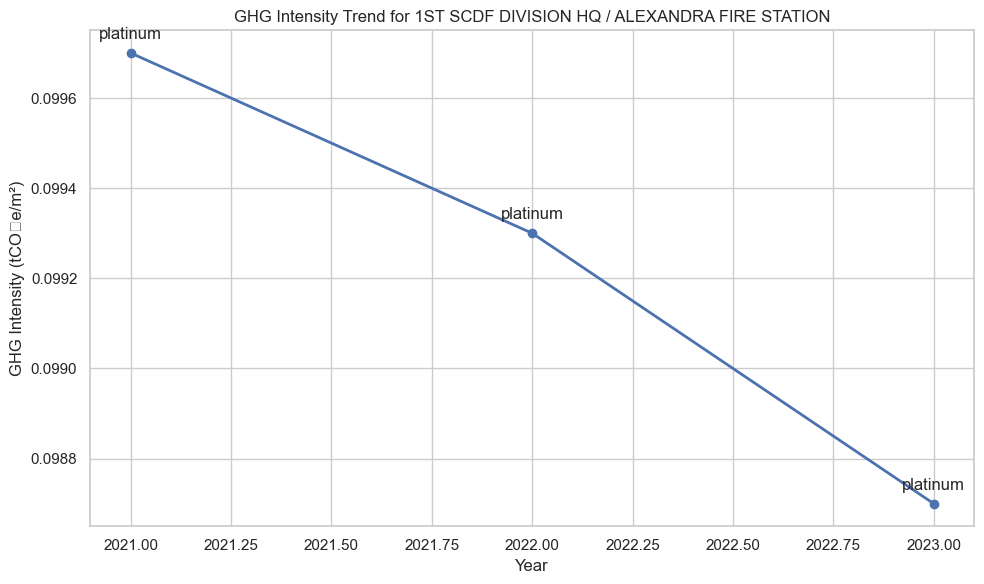


Analysis for: M1 , MAIN OPERATION CENTER
--------------------------------------------------

Yearly Predictions:
 year  ghg_intensity predicted_level
 2021         0.1054        goldplus
 2022         0.1061        goldplus
 2023         0.1052        goldplus


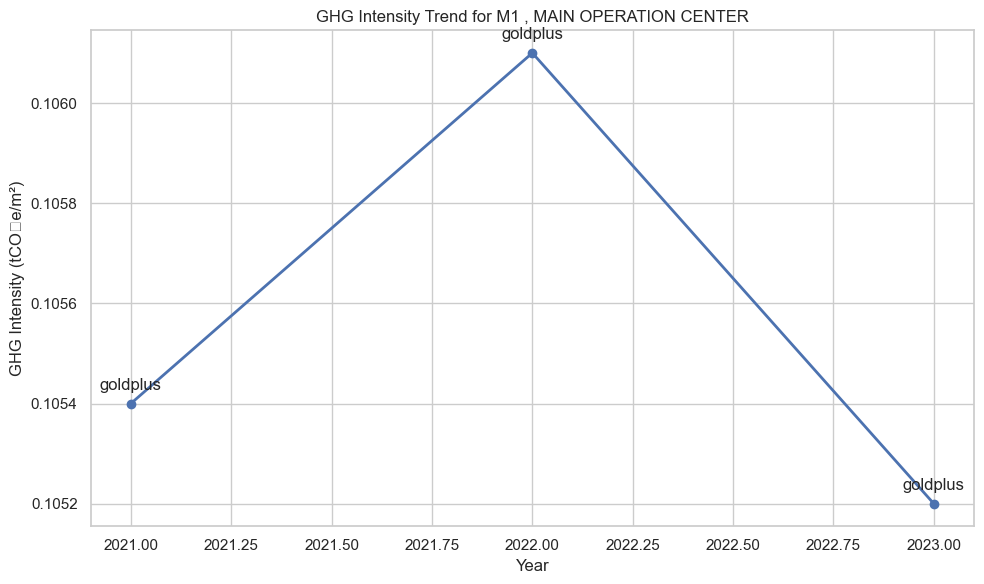

In [38]:
# Analyze sample buildings (randomly chosen)
print("\nDetailed Analysis of Sample Buildings:")
sample_buildings = predictions_df['building_name'].unique()
for building in np.random.choice(sample_buildings, 3, replace=False):
    analyze_building_trend(building)

In [39]:
# 10. Analyze specific buildings with pie charts
def analyze_building(building_name, df=buildings_without_gm):
    """Detailed analysis of a specific building"""
    building = df[df['Building Name'] == building_name].iloc[0]
    
    building_data = {
        'building_name': building['Building Name'],
        'gfa': building['GFA'],
        'scope1': building['Scope1'],
        'scope2': building['Scope2'],
        'scope3': building['Scope3']
    }
    
    result = validator.predict_and_validate(building_data)
    
    print(f"\nAnalysis for: {building_name}")
    print("-" * 50)
    print(f"GHG Intensity: {result['ghg_results']['intensity']:.4f} tCO₂e/m²")
    print(f"Predicted Level: {result['prediction']['predicted_level']}")
    print(f"Margin: {abs(result['prediction']['margin_percentage']):.2f}% "
          f"{'below' if result['prediction']['margin_percentage'] > 0 else 'above'} threshold")
    
    print("\nEmissions Breakdown:")
    print(f"Scope 1: {result['ghg_results']['breakdown']['scope1']:.2f} tCO₂e "
          f"({result['ghg_results']['breakdown']['scope1']/result['ghg_results']['total']*100:.1f}%)")
    print(f"Scope 2: {result['ghg_results']['breakdown']['scope2']:.2f} tCO₂e "
          f"({result['ghg_results']['breakdown']['scope2']/result['ghg_results']['total']*100:.1f}%)")
    print(f"Scope 3: {result['ghg_results']['breakdown']['scope3']:.2f} tCO₂e "
          f"({result['ghg_results']['breakdown']['scope3']/result['ghg_results']['total']*100:.1f}%)")
    
    # Visualization
    plt.figure(figsize=(8, 6))
    plt.pie([result['ghg_results']['breakdown'][f'scope{i}'] for i in [1,2,3]], 
            labels=[f'Scope {i}' for i in [1,2,3]], 
            autopct='%1.1f%%')
    plt.title(f'Emissions Breakdown for {building_name}')
    plt.show()



Analysis for: THONG TECK BUILDING
--------------------------------------------------
GHG Intensity: 0.1201 tCO₂e/m²
Predicted Level: gold
Margin: 19.93% below threshold

Emissions Breakdown:
Scope 1: 40.30 tCO₂e (2.9%)
Scope 2: 671.14 tCO₂e (48.7%)
Scope 3: 667.49 tCO₂e (48.4%)


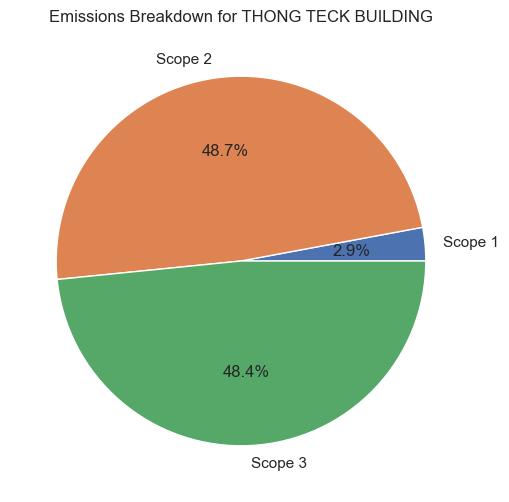


Analysis for: TEMPCO TECHNOMINIUM
--------------------------------------------------
GHG Intensity: 0.1073 tCO₂e/m²
Predicted Level: goldplus
Margin: 10.59% below threshold

Emissions Breakdown:
Scope 1: 40.94 tCO₂e (3.3%)
Scope 2: 606.71 tCO₂e (49.3%)
Scope 3: 583.05 tCO₂e (47.4%)


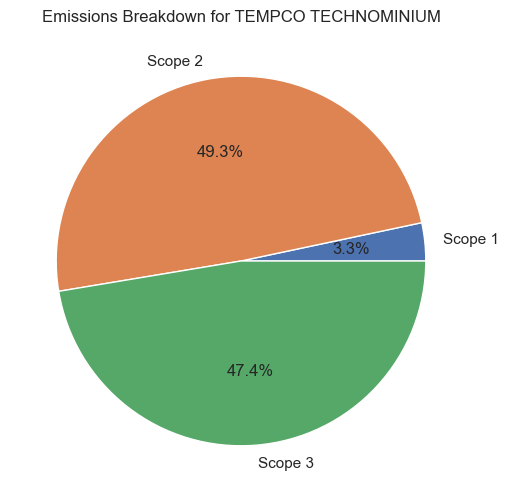


Analysis for: THE CENTRAL
--------------------------------------------------
GHG Intensity: 0.0893 tCO₂e/m²
Predicted Level: platinum
Margin: 10.72% below threshold

Emissions Breakdown:
Scope 1: 2.91 tCO₂e (0.8%)
Scope 2: 199.66 tCO₂e (52.1%)
Scope 3: 180.60 tCO₂e (47.1%)


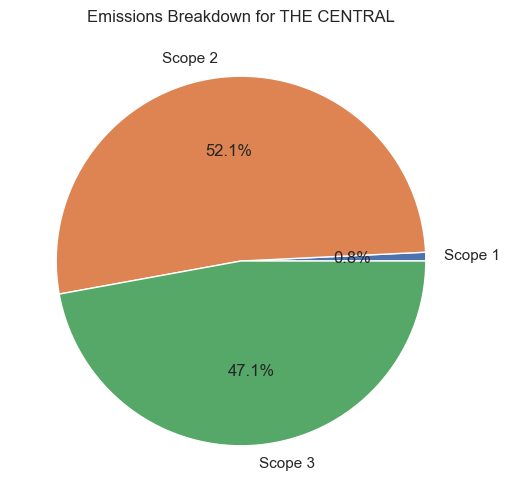

In [40]:
# Analyze sample buildings
example_buildings = predictions_df.sample(3)['building_name'].tolist()
for building in example_buildings:
    analyze_building(building)